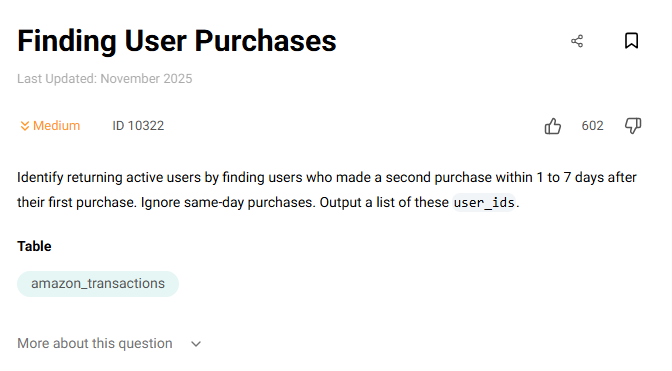

https://platform.stratascratch.com/coding/10322-finding-user-purchases?code_type=3

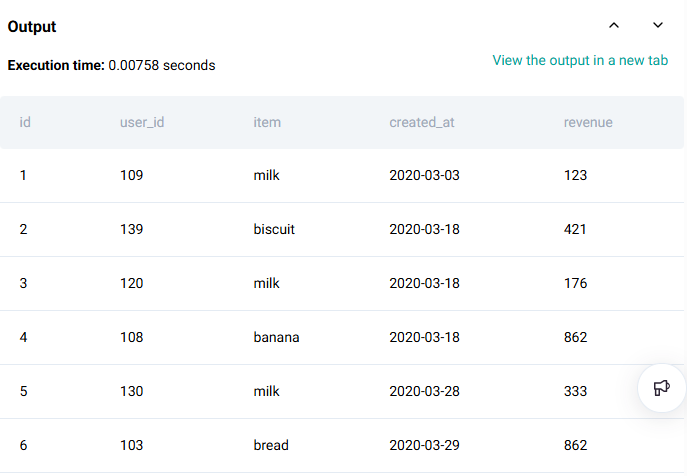

In [ ]:
WITH next_order AS (
    SELECT 
        user_id, 
        created_at,
        LEAD(created_at) OVER (PARTITION BY user_id ORDER BY created_at) second_order,
        datediff(LEAD(created_at) OVER (PARTITION BY user_id ORDER BY created_at), created_at) date_diff,
        ROW_NUMBER() OVER (PARTITION BY user_id ORDER BY created_at) first_transact
    FROM amazon_transactions
    GROUP BY 1,2
    ORDER BY user_id
)
SELECT 
    user_id
FROM next_order
WHERE first_transact =1
    AND date_diff BETWEEN 1 and 7;